In [1]:
from ortools.sat.python import cp_model
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
grid = [[10,10,10,10,10,10,10,10],
        [10,10,10,0,0,0,10,10],
        [10,0,2,1,0,0,10,10],
        [10,10,10,0,1,0,10,10],
        [10,0,10,10,1,0,10,10],
        [10,0,10,0,0,0,10,10],
        [10,1,0,1,1,1,0,10],
        [10,0,0,0,0,0,0,10],
        [10,10,10,10,10,10,10,10]]

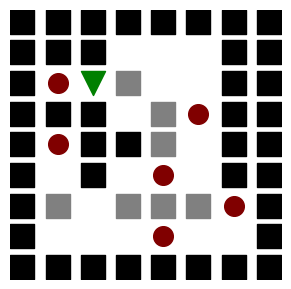

In [3]:
size = 300

loc = [(2,1), (3,5), (4,1), (5,4), (6,6), (7,4)]

feature = {0: {'color': 'w', 'marker': 's'},
         1: {'color': 'grey', 'marker': 's'},
         2: {'color': 'g', 'marker': 'v'},
         10: {'color': 'k', 'marker': 's'}}

plt.figure(figsize=(3.5,3.5))
for i in range(len(grid)):
    for j in range(len(grid[0])):
        if (i,j) in loc:
            plt.scatter(j,8-i, marker = 'o', s = 200, c = 'maroon')
        else:
            plt.scatter(j,8-i, marker = feature[grid[i][j]]['marker'], s= size, c = feature[grid[i][j]]['color'])

plt.axis('off');

In [4]:
# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

# Size of the grid
rows = range(9)
cols = range(8)

# Number of stages
S = range(100)

# Cell variables at each stage
x = {(i,j,s): model.NewIntVar(0, 10, f'x_{i}_{j}_{s}') for i in rows for j in cols for s in S}

left = {(i,j,s): model.NewBoolVar(f'up_{i}_{j}_{s}') for i in rows for j in cols for s in S}
right = {(i,j,s): model.NewBoolVar(f'down_{i}_{j}_{s}') for i in rows for j in cols for s in S}
up = {(i,j,s): model.NewBoolVar(f'left_{i}_{j}_{s}') for i in rows for j in cols for s in S}
down = {(i,j,s): model.NewBoolVar(f'right_{i}_{j}_{s}') for i in rows for j in cols for s in S}

term = {(s): model.NewBoolVar(f'term_{s}') for s in S}

for i in rows:
    for j in cols:
        model.Add(x[i,j,0] == grid[i][j])

for s in S:
    if s > 0:
        pass

# Solving
# status = solver.Solve(model)
# print(f"Status = {solver.StatusName(status)}")

# # Storing Solution
# sol = [solver.value(x[i,j,s]) for s in S for i in rows for j in cols]
# sol = np.reshape(sol, (len(S),len(rows),len(cols)))

In [5]:
x

{(0, 0, 0): x_0_0_0(0..10),
 (0, 0, 1): x_0_0_1(0..10),
 (0, 0, 2): x_0_0_2(0..10),
 (0, 0, 3): x_0_0_3(0..10),
 (0, 0, 4): x_0_0_4(0..10),
 (0, 0, 5): x_0_0_5(0..10),
 (0, 0, 6): x_0_0_6(0..10),
 (0, 0, 7): x_0_0_7(0..10),
 (0, 0, 8): x_0_0_8(0..10),
 (0, 0, 9): x_0_0_9(0..10),
 (0, 0, 10): x_0_0_10(0..10),
 (0, 0, 11): x_0_0_11(0..10),
 (0, 0, 12): x_0_0_12(0..10),
 (0, 0, 13): x_0_0_13(0..10),
 (0, 0, 14): x_0_0_14(0..10),
 (0, 0, 15): x_0_0_15(0..10),
 (0, 0, 16): x_0_0_16(0..10),
 (0, 0, 17): x_0_0_17(0..10),
 (0, 0, 18): x_0_0_18(0..10),
 (0, 0, 19): x_0_0_19(0..10),
 (0, 0, 20): x_0_0_20(0..10),
 (0, 0, 21): x_0_0_21(0..10),
 (0, 0, 22): x_0_0_22(0..10),
 (0, 0, 23): x_0_0_23(0..10),
 (0, 0, 24): x_0_0_24(0..10),
 (0, 0, 25): x_0_0_25(0..10),
 (0, 0, 26): x_0_0_26(0..10),
 (0, 0, 27): x_0_0_27(0..10),
 (0, 0, 28): x_0_0_28(0..10),
 (0, 0, 29): x_0_0_29(0..10),
 (0, 0, 30): x_0_0_30(0..10),
 (0, 0, 31): x_0_0_31(0..10),
 (0, 0, 32): x_0_0_32(0..10),
 (0, 0, 33): x_0_0_33(0..10),
